# ***Задание 3.***

---





# **Бинарная классификация**
 **Цель работы**:Познакомиться с применением модели машинного обучения для решения задачи классификации (метод логистической регресии).

Выполним анализ набора данных cancer.csv. Набор разработан для прогнозирования на основе различных признаков возникновения рецидива рака груди после прохождения некоторых видов лечения.

Атрибуты:
*  age – возраст пациента
*  menopause – менопаузальный статус пациенток
*  tumor-size – информация о размере опухоли
*  inv-nodes – информация о количестве подмышечных лимфатических узлов,
пораженных или пораженных раком молочной железы
* node-caps – информация о наличии или отсутствии инкапсуляции или вовлеченности опухоли в лимфатические узлы
*  deg-malig – степень злокачественности или тяжесть опухоли
*  breast – расположение опухоли в груди
*  breast-quad – информация о конкретном квадранте или области груди, пораженной раком
* irradiat – получал ли пациент лучевую терапию в рамках лечения рака груди.
* Class – указывает, был ли у пациентки рецидив рака (recurrence-events) или не было рецидива (целевая переменная).

# *1. Импортируйте необходимые библиотеки*

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


# *2. Получить представление о наборе данных*

In [5]:
df=pd.read_csv('cancer.csv')
df.shape


(683, 10)

In [6]:
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,5,1,1,1,2,1,3,1,1
1,0,5,4,4,5,7,10,3,2,1
2,0,3,1,1,1,2,2,3,1,1
3,0,6,8,8,1,3,4,3,7,1
4,0,4,1,1,3,2,1,3,1,1


In [7]:
df.describe()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,0.349927,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221
std,0.477296,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,0.000000,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,1.000000,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Class        683 non-null    int64
 1   age          683 non-null    int64
 2   menopause    683 non-null    int64
 3   tumor-size   683 non-null    int64
 4   inv-nodes    683 non-null    int64
 5   node-caps    683 non-null    int64
 6   deg-malig    683 non-null    int64
 7   breast       683 non-null    int64
 8   breast-quad  683 non-null    int64
 9   irradiat     683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


# *3. Проверить сбалансированность набора данных.*

In [9]:
(unique, counts)= np.unique(df['Class'], return_counts=True)
print('Уникальные знвчения целевой пееменной: ', unique)
print('Частота каждого уникального значения: ', counts)

Уникальные знвчения целевой пееменной:  [0 1]
Частота каждого уникального значения:  [444 239]


<Axes: xlabel='Class', ylabel='count'>

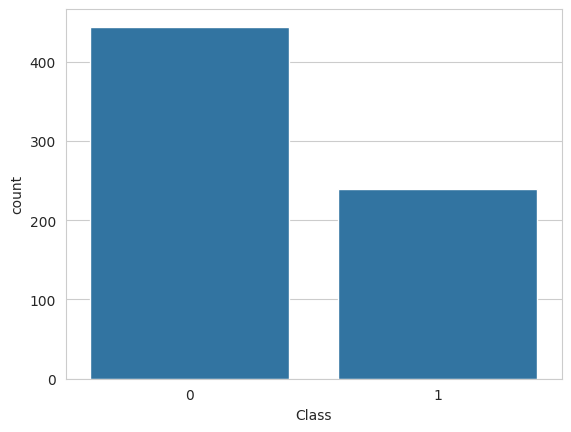

In [10]:
sns.set_style("whitegrid")
sns.countplot(df, x='Class')

Набор является сбалансированным. В наборе данных есть два класса, что делает эту задачу заачей бинарной классификации.

# *4. Произвести разведочный анализ*

In [11]:
# Проверка пропущенных значений
print(df.isnull().sum())

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64


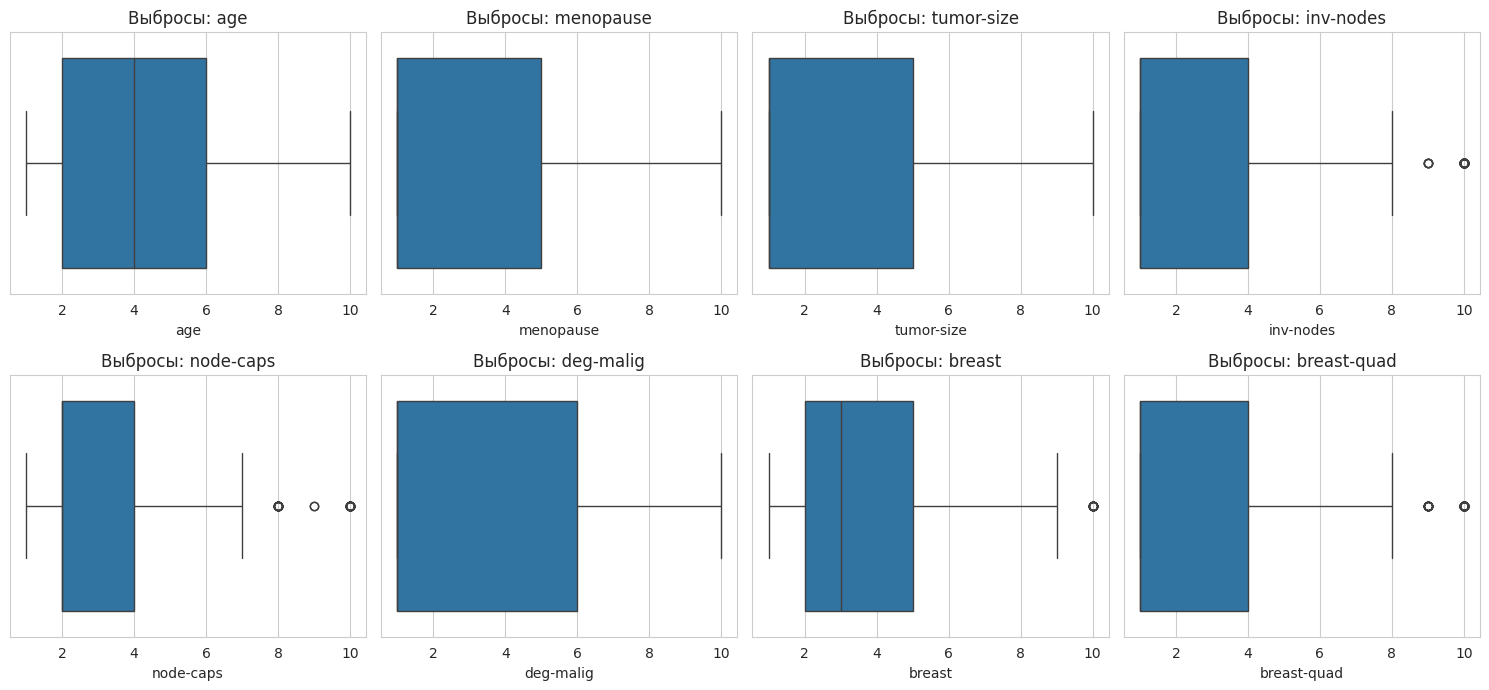

In [12]:
# Визуализация выбросов для всех признаков
numerical_cols = [col for col in df.columns.tolist() if col not in ['Class', 'irradiat']]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f'Выбросы: {col}')
plt.tight_layout()
plt.show()

# *5. Выводы о влиянии признаков*

In [13]:
class_correlations = df.corr()['Class'].drop('Class')
class_correlations.sort_values(ascending=False)

,Class
deg-malig,0.822696
tumor-size,0.821891
menopause,0.820801
breast,0.758228
breast-quad,0.718677
age,0.714790
inv-nodes,0.706294
node-caps,0.690958
irradiat,0.423448


Больше всего влияют :deg-malig, inv-nodes, tumor-size.

Наименьшее влияние имеет irradiat.


# *6. Предобработка данных*

In [14]:
# Исключаем слабокоррелирующие признаки
df_copy = df.copy()
cat_feat = ['irradiat']
df_copy.drop(cat_feat, axis=1, inplace=True)
df_copy.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad
0,0,5,1,1,1,2,1,3,1
1,0,5,4,4,5,7,10,3,2
2,0,3,1,1,1,2,2,3,1
3,0,6,8,8,1,3,4,3,7
4,0,4,1,1,3,2,1,3,1


In [15]:
# Разделяем данные на признаки и целевую переменную
y = df_copy['Class']
X = df_copy.drop('Class', axis=1)

X.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad
0,5,1,1,1,2,1,3,1
1,5,4,4,5,7,10,3,2
2,3,1,1,1,2,2,3,1
3,6,8,8,1,3,4,3,7
4,4,1,1,3,2,1,3,1


In [16]:
# Применяем операцию нормализации
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

X_normalized

array([[ 0.19790469, -0.70221201, -0.74177362, ..., -0.69885309,
        -0.18182716, -0.61292736],
       [ 0.19790469,  0.27725185,  0.26278299, ...,  1.77286724,
        -0.18182716, -0.28510482],
       [-0.51164337, -0.70221201, -0.74177362, ..., -0.4242175 ,
        -0.18182716, -0.61292736],
       ...,
       [ 0.19790469,  2.23617957,  2.2718962 , ..., -0.1495819 ,
         1.86073779,  2.33747554],
       [-0.15686934,  1.58320366,  0.93248739, ...,  0.12505369,
         2.67776377,  1.02618536],
       [-0.15686934,  1.58320366,  1.6021918 , ...,  0.39968928,
         2.67776377,  0.37054027]])

# *7. Разбить обработанный набор данных на обучающую и тестовую выборки*

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.25, random_state=0)


75% данных для обучения, 25% для тестирования

# *8. Произвести обучение модели логистическая регрессии*

In [18]:
# Обучаем модель логистической регрессии
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [19]:
# Делаем прогноз на основе данных тестирования
y_pred = model.predict(X_test)

In [20]:
# Рассчитываем показатели точности, сравнив фактические и прогнозируемые значения
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP) = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN) = ', TN)
print('False Negative(FN) = ', FN)

accuracy = (TP+TN) /(TP+FP+TN+FN)
print('Точность бинарной классификации = {:0.3f}'.format(accuracy))

True Positive(TP) =  57
False Positive(FP) =  4
True Negative(TN) =  103
False Negative(FN) =  7
Точность бинарной классификации = 0.936


In [21]:
# Оцениваем точность модели
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Точность:', accuracy)

Точность: 0.935672514619883


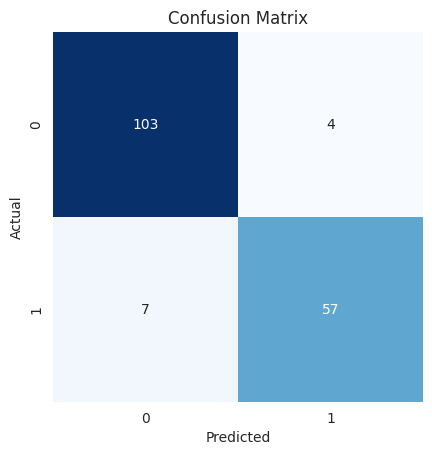

In [22]:
# Визуализируем матрицу ошибок
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
# Рассчитываем дополнительные метрики
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Точность: {precision:.2f}")
print(f"Полнота: {recall:.2f}")
print(f"F1-мера: {f1:.2f}")

Точность: 0.93
Полнота: 0.89
F1-мера: 0.91


In [24]:
df_copy.corr()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad
Class,1.000000,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677
age,0.714790,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066
menopause,0.820801,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346
tumor-size,0.821891,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963
inv-nodes,0.706294,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121
node-caps,0.690958,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926
deg-malig,0.822696,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280
breast,0.758228,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602
breast-quad,0.718677,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000


# *9. Построение ROC-кривой*

In [25]:
from sklearn.metrics import roc_curve, auc

# Получаем предсказанные вероятности для класса 1
y_score = model.predict_proba(X_test)[:, 1]

# Рассчитываем FPR, TPR и пороги
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Рассчитываем AUC
roc_auc = auc(fpr, tpr)

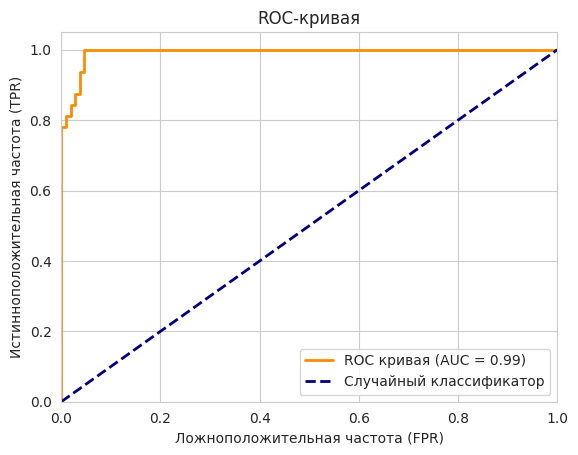

In [26]:
# Строим график
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Случайный классификатор')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложноположительная частота (FPR)')
plt.ylabel('Истинноположительная частота (TPR)')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()